# EM algorithms build from scratch



Import libaries

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
class Solution(object):
    def EM_algorithm(self, x, p_x, max_itr, mean, var) -> int:
        '''
        :param groupA:
        :param groupB:
        :param weighting:  initial weighting for two gaussian distribution
        :return:
        '''
        itrMean, itrVar = mean, var
        itr = 0
        ans_p_x = p_x
        while itr < max_itr:
            # literature
            print('*' * 20)
            print('itre: {:<5}'.format(itr))
            for i in range(len(itrMean)):
                print("Group {:<5}: [{:<5}, {:<5}] P(Group {:<1}) = {:<5}".format(i,itrMean[i],itrVar[i],i,ans_p_x[i]))
            # Graph
            aix_values = np.linspace(0, 300, 120)
            color = ['#A7414A','#0444BF']
            plt.figure(itr)
            plt.title('itr = {:<5}'.format(itr))
            for i in range(len(itrVar)):
                plt.plot(aix_values, self._gaussian(aix_values, itrMean[i], np.sqrt(itrVar[i])),color=color[i])
            # main
            prob = self.gaussian(x,itrMean,itrVar)

            prob_normalization = np.multiply(prob.T, ans_p_x).T

            prob_normalization = prob_normalization / np.sum(prob_normalization,axis=0)

            # EM: update the X and mean Variance
            for i in range(prob_normalization.shape[0]):
                itrVar[i] = np.sum((np.power(x - itrMean[i],2) * prob_normalization[i]) / np.sum(prob_normalization[i]))
                itrMean[i] = np.sum((x*prob_normalization[i]) / np.sum(prob_normalization[i]))
                # GMM
                ans_p_x[i] = np.sum(prob_normalization[i]) / len(prob_normalization[i])
                
            itr +=1
        return 0
    def _gaussian(self, x, mu, sig):
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    def gaussian(self, x, mean, var):
        if x is None:
            return -1
        ans = np.zeros((2,len(x)))
        for i in range(len(mean)):
            c = 1/np.sqrt(2*np.pi*var[i])
            b = (-1*np.power(x-mean[i],2)) / (2*var[i])
            ans[i] = c*np.exp(b)
        return ans

## Parameters 
max_itr: Maximum times of iterations


$P(\pi_j)$: Probability of assumption PDF will happened. In our case, Gaussian distribution is selected to cluster objects.

$N(\mu_j,\sigma_j^2)$: Assumption PDF. $j = 2$ for two-class clustering. $A = N(\mu_1,\sigma_1^2), B = N(\mu_2,\sigma_2^2)$

EM Updates:

$\alpha_i = \frac{P(x_i|A)P(\pi_A)}{P(x_i|A)P(\pi_A)+P(x_i|B)P(\pi_B)},\;i\in{1...N}$

$\mu_{A,\;i+1} = \frac{\alpha_1 x_1+\alpha_2 x_2+...+\alpha_n x_n}{\sum_{k=1}^{n}\;\alpha_k}$

$\sigma_{A,\;i+1}^2 = \frac{\alpha_1(x_1-\mu_{i})^2+\alpha_2(x_2-\mu_{i})^2+...+\alpha_n(x_n-\mu_{i})^2}{\sum_{k=1}^{n}\;\alpha_k}$

$\beta_i = \frac{P(x_i|B)P(\pi_B)}{P(x_i|A)P(\pi_A)+P(x_i|B)P(\pi_B)}$

$\mu_{B,\;i+1} = \frac{\beta_1 x_1+\beta_2 x_2+...+\beta_n x_n}{\sum_{k=1}^{n}\;\beta_k}$

$\sigma_{B,\;i+1}^2 = \frac{\beta_1(x_1-\mu_{i})^2+\beta_2(x_2-\mu_{i})^2+...+\beta_n(x_n-\mu_{i})^2}{\sum_{k=1}^{n}\;\beta_k}$

$\pi_{i+1,\;A} = \frac{\sum_{k=1}^{n}\;\alpha_k}{N}$

$\pi_{i+1,\;B} = \frac{\sum_{k=1}^{n}\;\beta_k}{N}$


********************
itre: 0    
Group 0    : [103  , 87.35] P(Group 0) = 0.19999999999999996
Group 1    : [172  , 36.46] P(Group 1) = 0.8  
********************
itre: 1    
Group 0    : [155.44520949376064, 2751.3125445301584] P(Group 0) = 2.037524669760381e-07
Group 1    : [165.50000204868877, 119.0999682607312] P(Group 1) = 0.9999997962475332
********************
itre: 2    
Group 0    : [167.02200244273567, 231.3233997138796] P(Group 0) = 5.91043750839356e-08
Group 1    : [165.49999991004296, 76.84999865433048] P(Group 1) = 0.999999940895625
********************
itre: 3    
Group 0    : [168.22291370503572, 101.71793187748327] P(Group 0) = 5.089228867001777e-08
Group 1    : [165.49999986142467, 76.84999843048158] P(Group 1) = 0.9999999491077112
********************
itre: 4    
Group 0    : [168.53160752845534, 90.84305806464963] P(Group 0) = 5.098741300574379e-08
Group 1    : [165.49999984542615, 76.8499988227816] P(Group 1) = 0.9999999490125869
********************
itre: 5    
Gro

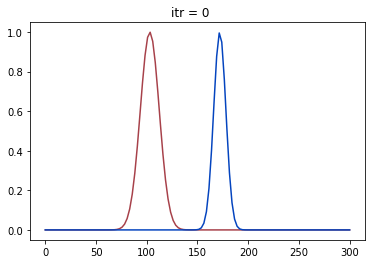

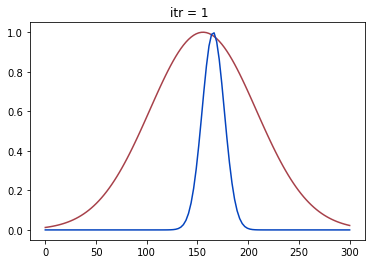

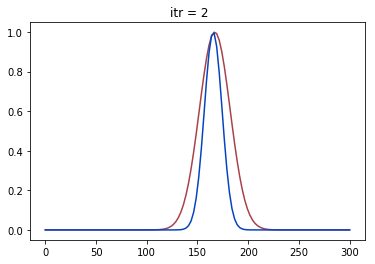

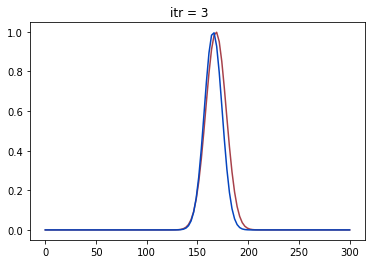

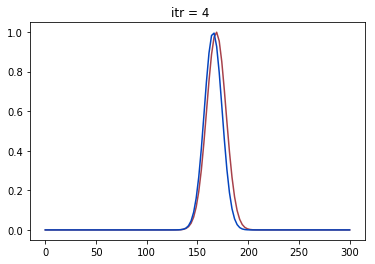

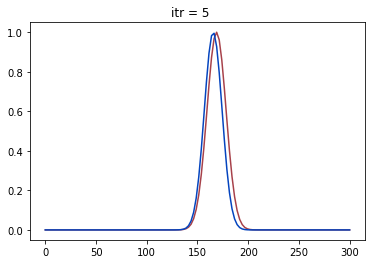

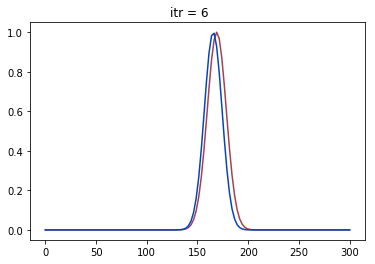

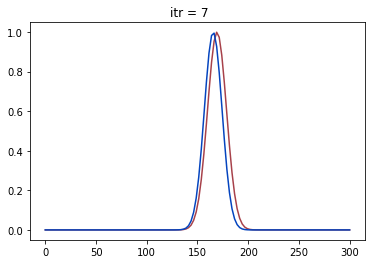

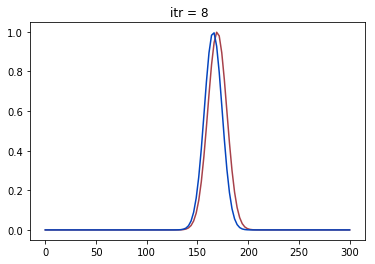

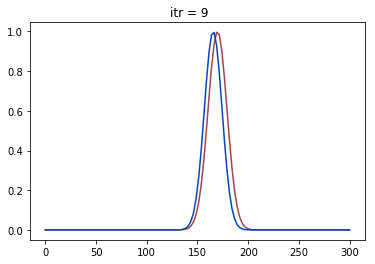

In [61]:
if __name__ == '__main__':
    method = Solution()
    max_itr = 10
    
    ## example A: implmented EM algorithms for two-class clustering
    #  input data: X
    inputX = np.array([155, 157, 157, 159, 163,165, 167, 172, 180, 180])
    # initial guest
    al = 0.8  # P(X=1) = al
    p_pi = np.array([1 - al, al])
    mean = [103, 172]
    var = [87.35, 36.46]
    
    method.EM_algorithm(inputX, p_pi, max_itr, mean, var)